Due to some issues regarding using the TimesFM model, the notebook was edited to use on Colab.

In [30]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

In [ ]:
df_train = pd.read_csv("./../data/preprocessed/train.csv")
df_test = pd.read_csv("./../data/preprocessed/test.csv")

df_train_lag = pd.read_csv("./../data/preprocessed/train_lag.csv")
df_test_lag = pd.read_csv("./../data/preprocessed/test_lag.csv")

In [32]:
target = "Energy_ktoe"

cols_to_drop = ["Year", "End_Use","Energy_ktoe"]

In [33]:
feature_cols = [col for col in df_train.columns if col not in cols_to_drop]
feature_cols_lag = [col for col in df_train_lag.columns if col not in cols_to_drop]

truth = df_test[target]
truth_lag = df_test_lag[target]

print(feature_cols)
print(feature_cols_lag)

['Population', 'Households', 'Inhabitants per household', 'HDD', 'CDD', 'GDP', 'Expenditure', 'Tech_Advanced electric heating', 'Tech_Air conditioning', 'Tech_Biomass', 'Tech_Conventional electric heating', 'Tech_Diesel oil', 'Tech_Distributed heat', 'Tech_Electricity', 'Tech_Electricity in circulation', 'Tech_Geothermal', 'Tech_Liquified petroleum gas (LPG)', 'Tech_Natural gas', 'Tech_Solar', 'Tech_Solids']
['Population', 'Households', 'Inhabitants per household', 'HDD', 'CDD', 'GDP', 'Expenditure', 'Energy_Lag1', 'Tech_Advanced electric heating', 'Tech_Air conditioning', 'Tech_Biomass', 'Tech_Conventional electric heating', 'Tech_Diesel oil', 'Tech_Distributed heat', 'Tech_Electricity', 'Tech_Electricity in circulation', 'Tech_Geothermal', 'Tech_Liquified petroleum gas (LPG)', 'Tech_Natural gas', 'Tech_Solar', 'Tech_Solids']


In [44]:
#First benchmark model
## No lag data

lr = LinearRegression()
lr.fit(df_train[feature_cols], df_train[target])
lr_preds = lr.predict(df_test[feature_cols])
mape_lr = mean_absolute_percentage_error(df_test[target], lr_preds)

wmape_lr = np.sum(np.abs(df_test[target] - lr_preds)) / np.sum(np.abs(df_test[target]))

mae_lr = mean_absolute_error(df_test[target], lr_preds)

mse_lr = mean_squared_error(df_test[target], lr_preds)
rmse_lr = np.sqrt(mse_lr)

print(f"MAE:  {mae_lr} ")
print(f"RMSE: {rmse_lr}")
print(f"MAPE:  {mape_lr}")
print(f"WMAPE: {wmape_lr}")

MAE:  2655.3902745656355
RMSE: 3790.689165402593
MAPE:  33.18317674271583
WMAPE: 1.1498440492800974


In [46]:
#Seccodn benchmark model
## Including lag data

lr_lag = LinearRegression()
lr_lag.fit(df_train_lag[feature_cols_lag], df_train_lag[target])
lr_preds_lag = lr_lag.predict(df_test_lag[feature_cols_lag])
mape_lr_lag = mean_absolute_percentage_error(df_test_lag[target], lr_preds_lag)

wmape_lr_lag = np.sum(np.abs(df_test_lag[target] - lr_preds_lag)) / np.sum(np.abs(df_test_lag[target]))

mae_lr_lag = mean_absolute_error(df_test_lag[target], lr_preds_lag)

mse_lr_lag = mean_squared_error(df_test_lag[target], lr_preds_lag)
rmse_lr_lag = np.sqrt(mse_lr_lag)

print(f"MAE:  {mae_lr_lag}")
print(f"RMSE: {rmse_lr_lag}")
print(f"MAPE:  {mape_lr_lag}")
print(f"WMAPE: {wmape_lr_lag}")

MAE:  3343.372424087111
RMSE: 3675.7615034568184
MAPE:  79.17942783552073
WMAPE: 1.4477558810041937


In [49]:
#Third benchmark model
## No lag data

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(df_train[feature_cols], df_train[target])
pred_dt = dt.predict(df_test[feature_cols])
mape_dt = mean_absolute_percentage_error(df_test[target], pred_dt)

wmape_dt = np.sum(np.abs(df_test[target] - pred_dt)) / np.sum(np.abs(df_test[target]))

mae_dt = mean_absolute_error(df_test[target], pred_dt)

mse_dt = mean_squared_error(df_test[target], pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"MAE:  {mae_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAPE:  {mape_dt}")
print(f"WMAPE: {wmape_dt}")

MAE:  1931.1626238906983
RMSE: 3334.015076578574
MAPE:  11.037317388016199
WMAPE: 0.836237095745216


In [51]:
#Fourth benchmark model
## Including lag data

dt_lag = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_lag.fit(df_train_lag[feature_cols_lag], df_train_lag[target])
pred_dt_lag = dt_lag.predict(df_test_lag[feature_cols_lag])
mape_dt_lag = mean_absolute_percentage_error(df_test_lag[target], pred_dt_lag)

wmape_dt_lag = np.sum(np.abs(df_test_lag[target] - pred_dt_lag)) / np.sum(np.abs(df_test_lag[target]))

mae_dt_lag = mean_absolute_error(df_test_lag[target], pred_dt_lag)

mse_dt_lag = mean_squared_error(df_test_lag[target], pred_dt_lag)
rmse_dt_lag = np.sqrt(mse_dt_lag)

print(f"MAE:  {mae_dt_lag}")
print(f"RMSE: {rmse_dt_lag}")
print(f"MAPE:  {mape_dt_lag}")
print(f"WMAPE: {wmape_dt_lag}")

MAE:  432.75296077294126
RMSE: 1129.9043798521645
MAPE:  1.4816773927810118
WMAPE: 0.18739182014760764


In [52]:
#Fifth benchmark model
## No lag data

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

xgb.fit(df_train[feature_cols], df_train[target])
pred_xgb = xgb.predict(df_test[feature_cols])
mape_xgb = mean_absolute_percentage_error(df_test[target], pred_xgb)

wmape_xgb = np.sum(np.abs(df_test[target] - pred_xgb)) / np.sum(np.abs(df_test[target]))

mae_xgb = mean_absolute_error(df_test[target], pred_xgb)

mse_xgb = mean_squared_error(df_test[target], pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"MAE:  {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"MAPE:  {mape_xgb}")
print(f"WMAPE: {wmape_xgb}")

MAE:  1925.0302676158724
RMSE: 3332.0594189873605
MAPE:  9.384629963809312
WMAPE: 0.8335816467747902


In [53]:
#Sixth benchmark model
## Including lag data

xgb_lag = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

xgb_lag.fit(df_train_lag[feature_cols_lag], df_train_lag[target])
pred_xgb_lag = xgb_lag.predict(df_test_lag[feature_cols_lag])
mape_xgb_lag = mean_absolute_percentage_error(df_test_lag[target], pred_xgb_lag)

wmape_xgb_lag = np.sum(np.abs(df_test_lag[target] - pred_xgb_lag)) / np.sum(np.abs(df_test_lag[target]))

mae_xgb_lag = mean_absolute_error(df_test[target], pred_xgb_lag)

mse_xgb_lag = mean_squared_error(df_test[target], pred_xgb_lag)
rmse_xgb_lag = np.sqrt(mse_xgb_lag)

print(f"MAE:  {mae_xgb_lag}")
print(f"RMSE: {rmse_xgb_lag}")
print(f"MAPE:  {mape_xgb_lag}")
print(f"WMAPE: {wmape_xgb_lag}")

MAE:  285.1953988485788
RMSE: 712.066020547727
MAPE:  1.4022357555888758
WMAPE: 0.12349605833430441


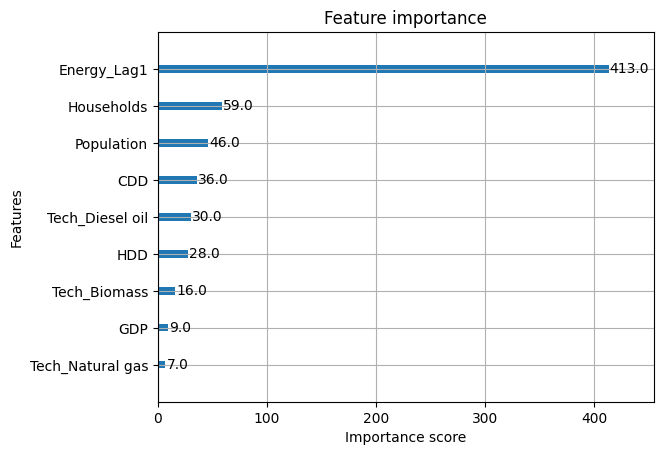

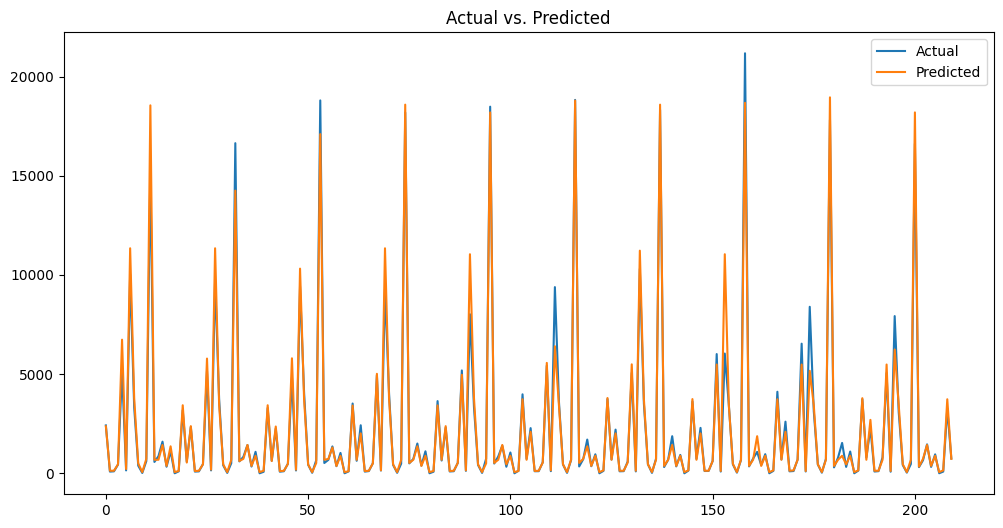

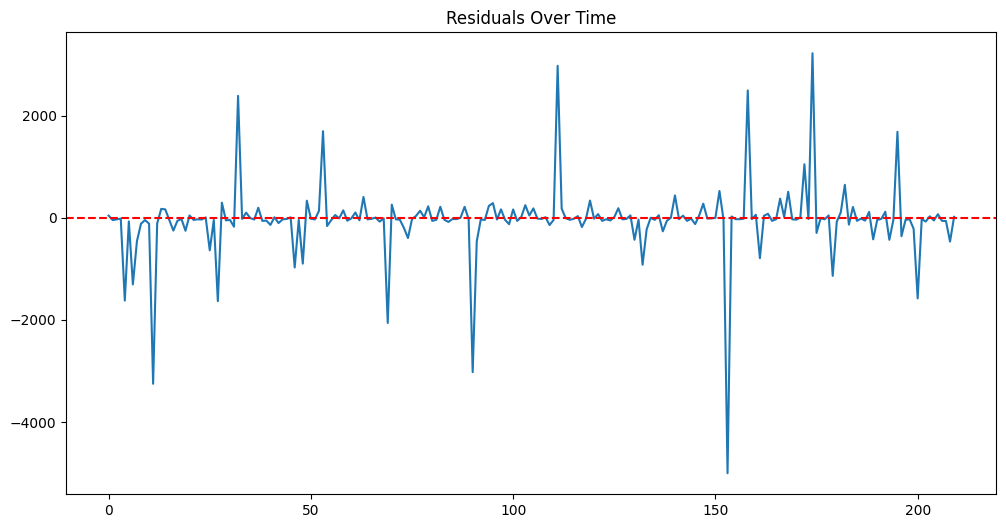

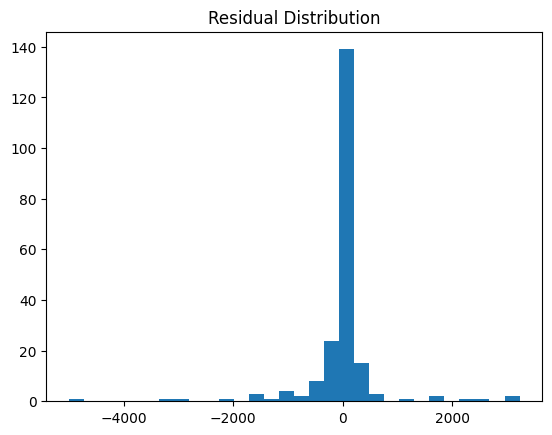

In [55]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

plot_importance(xgb_lag)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test_lag[target], label="Actual")
plt.plot(pred_xgb_lag, label="Predicted")
plt.legend()
plt.title("Actual vs. Predicted")
plt.show()

residuals = df_test_lag[target] - pred_xgb_lag
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Over Time")
plt.show()

plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()



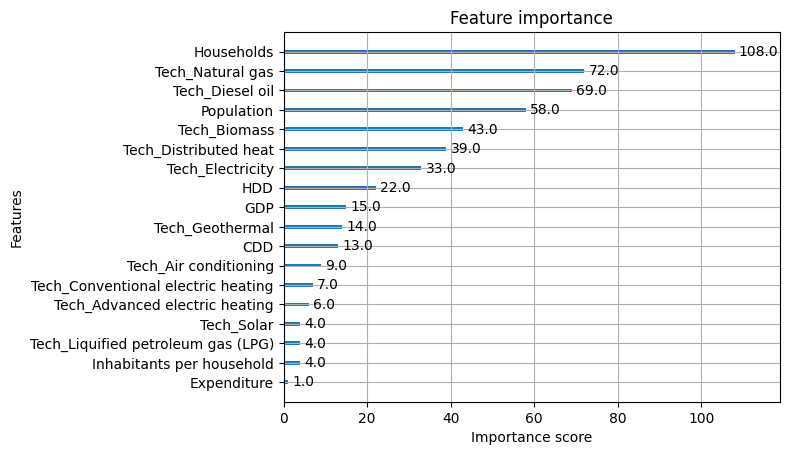

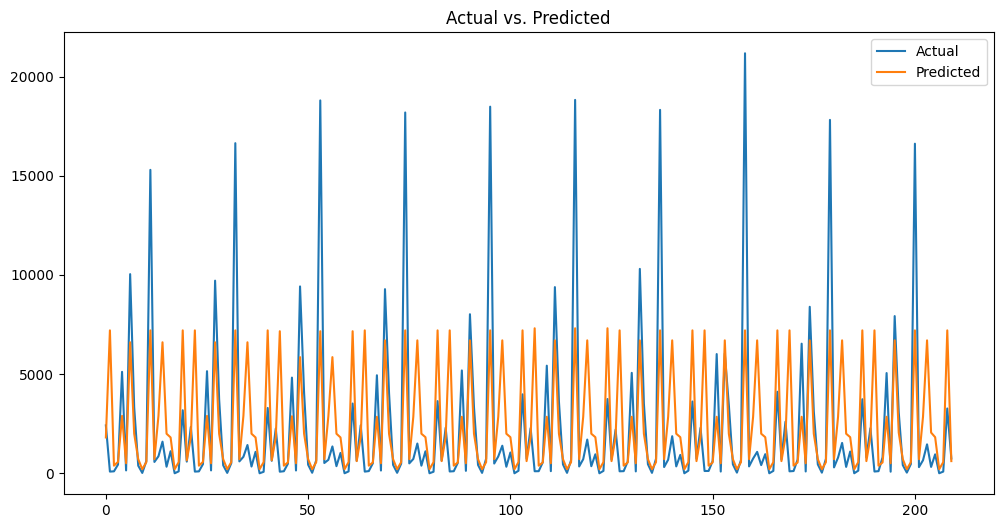

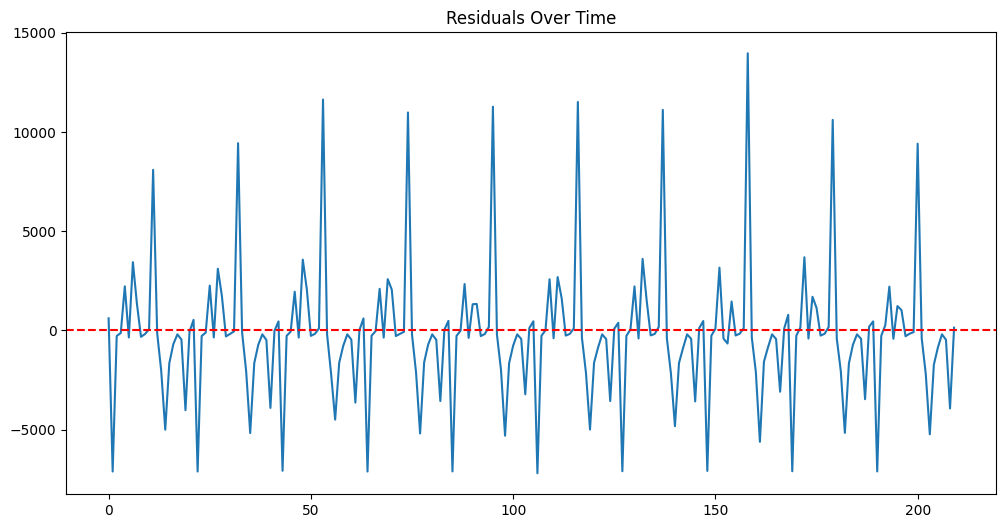

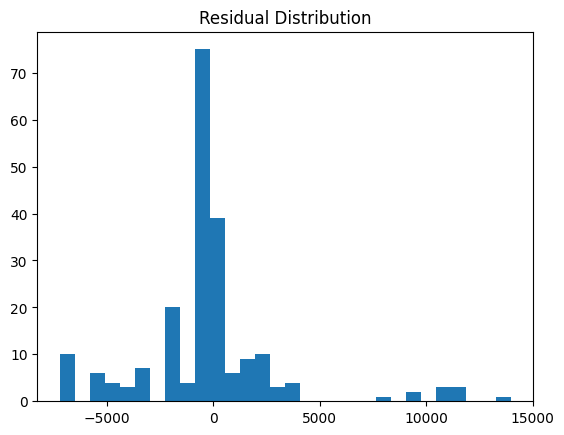

In [ ]:
plot_importance(xgb)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_test[target], label="Actual")
plt.plot(pred_xgb, label="Predicted")
plt.legend()
plt.title("Actual vs. Predicted")
plt.show()

residuals = df_test[target] - pred_xgb
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Over Time")
plt.show()

plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()


*Implementing TimesFM*


In [18]:
import timesfm

In [17]:
!pip install git+https://github.com/google-research/timesfm.git

  Cloning https://github.com/google-research/timesfm.git to /tmp/pip-req-build-l9m46vqx
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/timesfm.git /tmp/pip-req-build-l9m46vqx
  Resolved https://github.com/google-research/timesfm.git to commit 6bd8044275f8b76cdc9554f2fecccac5f31a156c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached InquirerPy-0.3.4-py3-none-any.whl.metadata (8.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for timesfm: filename=timesfm-2.0.0-py3-none-any.whl size=43813 sha256=faa588ac8208da97e160f09a19bbb007b56d12caa915dbb9902f49d3029c182a
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgjql3i9/wheels/d0/38/4b/2726a715c889b3debae031f66677e568b6cac46fdc9f1c63eb
Successfully built timesfm


In [19]:
tech_cols = [c for c in df_train.columns if c.startswith('Tech_')]
df_train['active_tech'] = df_train[tech_cols].idxmax(axis=1)
df_train['unique_id'] = df_train['End_Use'] + " - " + df_train['active_tech']

In [ ]:
df_test['active_tech'] = df_test[tech_cols].idxmax(axis=1)
df_test['unique_id'] = df_test['End_Use'] + " - " + df_test['active_tech']
pivot_train = df_train.pivot(index='unique_id', columns='Year', values='Energy_ktoe')

# Convert to list of numpy arrays (the format TimesFM expects)
history_input = [row for row in pivot_train.values]

In [22]:
tfm = timesfm.TimesFM_2p5_200M_torch.from_pretrained(
    "google/timesfm-2.5-200m-pytorch",
    torch_compile=True
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/475 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/475 [00:00<?, ?B/s]

Downloaded.


model.safetensors:   0%|          | 0.00/925M [00:00<?, ?B/s]

Compiling model...


In [ ]:
config = timesfm.ForecastConfig(
    max_context=512,       
    max_horizon=12,        
    normalize_inputs=True,
    use_continuous_quantile_head=True,
)
tfm.compile(config)


point_forecast, quantile_forecast = tfm.forecast(
    inputs=history_input,
    horizon=10
)

forecast_df = pd.DataFrame(
    point_forecast,
    index=pivot_train.index,
    columns=range(2014, 2024)
)

forecast_df.head()


Forecast successfully generated!
                                                       2014         2015  \
unique_id                                                                  
Cooking - Tech_Electricity                      2567.869385  2582.935303   
Cooking - Tech_Natural gas                        91.663918    91.392693   
Space cooling - Tech_Air conditioning             99.272247    99.484909   
Space heating - Tech_Advanced electric heating   451.296051   477.701691   
Space heating - Tech_Biomass                    6624.374512  6563.316895   

                                                       2016         2017  \
unique_id                                                                  
Cooking - Tech_Electricity                      2605.588867  2622.300537   
Cooking - Tech_Natural gas                        90.648804    90.386414   
Space cooling - Tech_Air conditioning             97.897331    96.814987   
Space heating - Tech_Advanced electric heating   507.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


test_df = pd.read_csv("test.csv")
tech_cols = [c for c in test_df.columns if c.startswith('Tech_')]

test_df['active_tech'] = test_df[tech_cols].idxmax(axis=1)
test_df['unique_id'] = test_df['End_Use'] + " - " + test_df['active_tech']

# Pivot to get shape: (Rows=Series, Cols=Years)
ground_truth = test_df.pivot(index='unique_id', columns='Year', values='Energy_ktoe')
ground_truth = ground_truth.fillna(0) # Assume missing records imply 0 energy use


common_index = forecast_df.index.intersection(ground_truth.index)
common_columns = forecast_df.columns.intersection(ground_truth.columns)

y_pred = forecast_df.loc[common_index, common_columns]
y_true = ground_truth.loc[common_index, common_columns]

print(f"Evaluating on {len(common_index)} common time series over {len(common_columns)} years.")


mae = mean_absolute_error(y_true, y_pred)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)


wmape = np.sum(np.abs(y_true - y_pred).values) / np.sum(np.abs(y_true).values)

print("\n=== Performance Metrics ===")
print(f"MAE:   {mae:,.2f} ktoe")
print(f"RMSE:  {rmse:,.2f} ktoe")
print(f"WMAPE: {wmape:.2%} (Weighted Error)")


Evaluating on 21 common time series over 10 years.

=== Performance Metrics ===
MAE:   395.28 ktoe
RMSE:  903.60 ktoe
WMAPE: 17.12% (Weighted Error)

=== Top 5 Series with Highest Error (MAE) ===
unique_id
Space heating - Tech_Diesel oil          2974.470548
Space heating - Tech_Natural gas         1670.547966
Space heating - Tech_Biomass              972.623625
Space heating - Tech_Distributed heat     526.505897
Water heating - Tech_Diesel oil           465.458049
dtype: float64


/tmp/ipython-input-3499994893.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='MAE', y='Model', data=metrics_df.sort_values('MAE'), palette='viridis')
/tmp/ipython-input-3499994893.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='RMSE', y='Model', data=metrics_df.sort_values('RMSE'), palette='magma')
/tmp/ipython-input-3499994893.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='WMAPE_pct', y='Model', data=metrics_df.sort_values('WMAPE_pct'), palette='coolwarm')


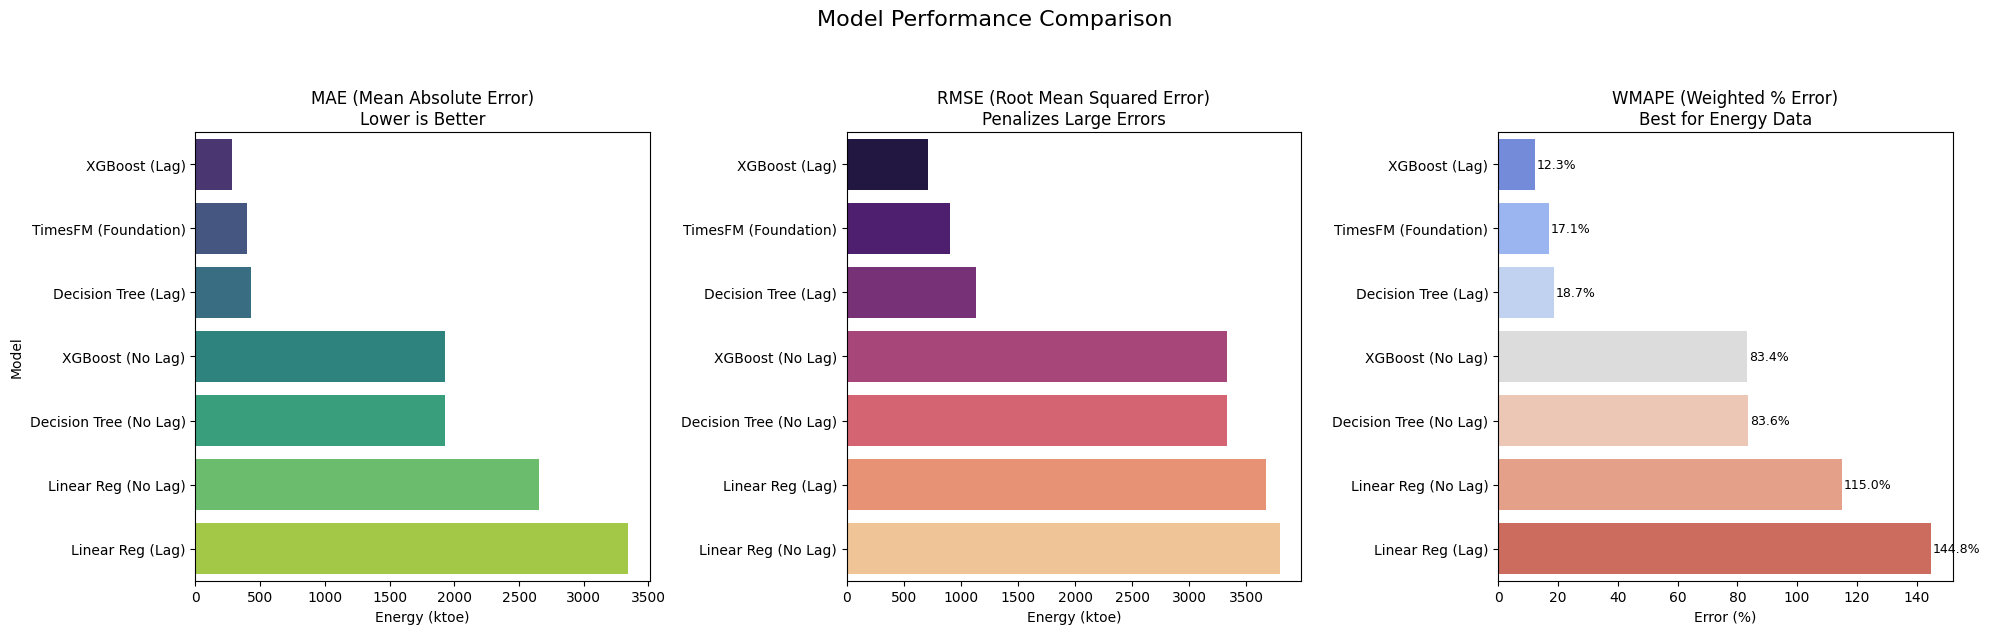


=== Detailed Performance Table ===
                    Model      MAE     RMSE  WMAPE
5           XGBoost (Lag)   285.20   712.07   0.12
6    TimesFM (Foundation)   395.28   903.60   0.17
4     Decision Tree (Lag)   432.75  1129.90   0.19
2        XGBoost (No Lag)  1925.03  3332.06   0.83
1  Decision Tree (No Lag)  1931.16  3334.02   0.84
0     Linear Reg (No Lag)  2655.39  3790.69   1.15
3        Linear Reg (Lag)  3343.37  3675.76   1.45


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    wmape = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))
    return {"Model": name, "MAE": mae, "RMSE": rmse, "WMAPE": wmape}

# Define Ground Truths
y_test_no_lag = df_test['Energy_ktoe'].values
y_test_lag = df_test_lag['Energy_ktoe'].values if 'df_test_lag' in locals() else None

# (TimesFM outputs a matrix, we need to flatten it aligned with the test set)
if 'forecast_df' in locals():
    if 'unique_id' not in df_test.columns:
        tech_cols = [c for c in df_test.columns if c.startswith('Tech_')]
        df_test['active_tech'] = df_test[tech_cols].idxmax(axis=1)
        df_test['unique_id'] = df_test['End_Use'] + " - " + df_test['active_tech']

    gt_pivot = df_test.pivot(index='unique_id', columns='Year', values='Energy_ktoe').fillna(0)

    common_idx = forecast_df.index.intersection(gt_pivot.index)
    common_cols = forecast_df.columns.intersection(gt_pivot.columns)

    tfm_true = gt_pivot.loc[common_idx, common_cols].values.flatten()
    tfm_pred = forecast_df.loc[common_idx, common_cols].values.flatten()
else:
    tfm_true, tfm_pred = None, None

results = []

models_to_eval = [
    ("Linear Reg (No Lag)", locals().get('lr_preds'), y_test_no_lag),
    ("Decision Tree (No Lag)", locals().get('pred_dt'), y_test_no_lag),
    ("XGBoost (No Lag)", locals().get('pred_xgb'), y_test_no_lag),
    ("Linear Reg (Lag)", locals().get('lr_preds_lag'), y_test_lag),
    ("Decision Tree (Lag)", locals().get('pred_dt_lag'), y_test_lag),
    ("XGBoost (Lag)", locals().get('pred_xgb_lag'), y_test_lag),
    ("TimesFM (Foundation)", tfm_pred, tfm_true)
]

for name, preds, truth in models_to_eval:
    if preds is not None and truth is not None:
        try:
            results.append(get_metrics(name, truth, preds))
        except Exception as e:
            print(f"Could not evaluate {name}: {e}")

metrics_df = pd.DataFrame(results)

if not metrics_df.empty:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    plt.suptitle("Model Performance Comparison", fontsize=16, y=1.05)

    sns.barplot(ax=axes[0], x='MAE', y='Model', data=metrics_df.sort_values('MAE'), palette='viridis')
    axes[0].set_title("MAE (Mean Absolute Error)\nLower is Better")
    axes[0].set_xlabel("Energy (ktoe)")

    sns.barplot(ax=axes[1], x='RMSE', y='Model', data=metrics_df.sort_values('RMSE'), palette='magma')
    axes[1].set_title("RMSE (Root Mean Squared Error)\nPenalizes Large Errors")
    axes[1].set_xlabel("Energy (ktoe)")
    axes[1].set_ylabel("") 

    metrics_df['WMAPE_pct'] = metrics_df['WMAPE'] * 100
    sns.barplot(ax=axes[2], x='WMAPE_pct', y='Model', data=metrics_df.sort_values('WMAPE_pct'), palette='coolwarm')
    axes[2].set_title("WMAPE (Weighted % Error)\nBest for Energy Data")
    axes[2].set_xlabel("Error (%)")
    axes[2].set_ylabel("") 

    for i, val in enumerate(metrics_df.sort_values('WMAPE_pct')['WMAPE_pct']):
        axes[2].text(val + 0.5, i, f"{val:.1f}%", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\n=== Detailed Performance Table ===")
    print(metrics_df.drop(columns=['WMAPE_pct']).sort_values('WMAPE').round(2))